Load the `tidyverse` and `palmerpenguins` packages.

In [ ]:
# load package here





In [ ]:
penguins |> glimpse()

Make a data frame called "adelie" of penguins data with just "Adelie" penguins no missing data.

❗️*Hint: pipe your data in to the `drop_na` function to remove missing values*

Plot `bill_depth_mm` (y-axis) as a function of `bill_length_mm` (x-axis) for your "adelie" dataset.

Run the code below to generate 1000 random models.

In [ ]:
n = 1000

models = tibble(
    intercept = runif(n, 0, 40),
    slope = runif(n, -5, 5)
)

models |> glimpse()

Re-create your scatter chart from above but this time overlay what the models look like by adding this layer:

```r
geom_abline(aes(slope = slope, intercept = intercept), data = models, alpha = 0.5, color = 'coral')
```

What's the best model? Below we create a data frame of models over a range of values for the "slope" and "intercept." We also calculate a metric that we can use to rank models. In this case, let's use [sum of squared error](https://en.wikipedia.org/wiki/Residual_sum_of_squares) (SSE).

In [3]:
model_estimate = function(slope, intercept, data) {
    slope * data$bill_depth_mm + intercept
}

sum_of_squared_eror = function(slope, intercept, data) {
  diff = data$bill_length_mm - model_estimate(slope, intercept, data)
  sum(diff ^ 2)
}

models2 = expand.grid(
  intercept = seq(10, 50, length = 80),
  slope = seq(-2.5, 2.5, length = 80)
) %>% mutate(sse = purrr::pmap_vec(., sum_of_squared_eror, data = adelie))

models2 |> glimpse()

Rows: 6,400
Columns: 3
$ intercept <dbl> 10.00000, 10.50633, 11.01266, 11.51899, 12.02532, 12.53165, …
$ slope     <dbl> -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, …
$ sse       <dbl> 817804.8, 806799.2, 795868.4, 785012.4, 774231.4, 763525.1, …


Let's plot SSE for all the models we tested and highlight the five best scoring models.

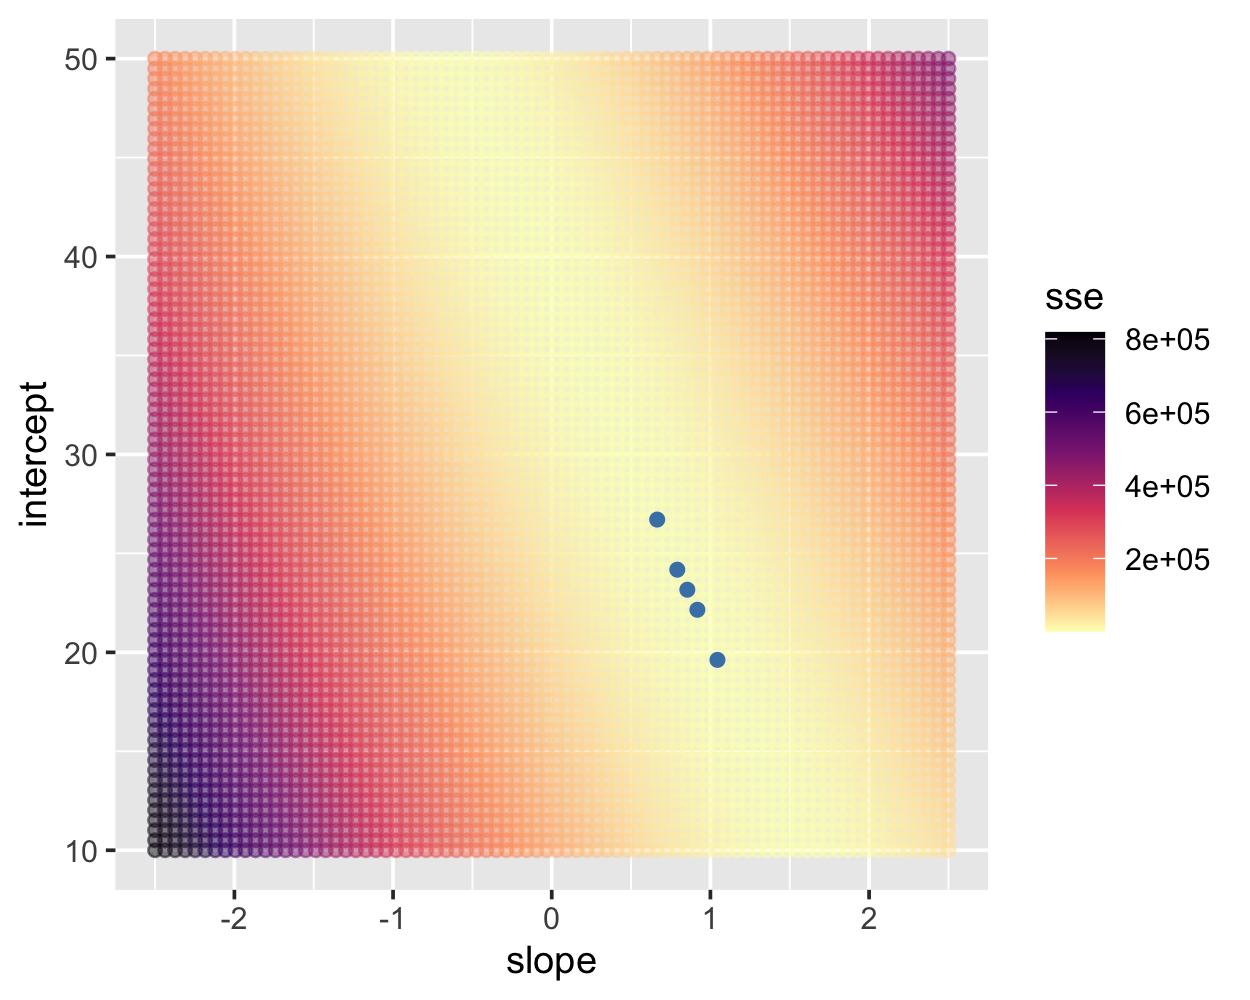

In [4]:
p = ggplot(models2, aes(slope, intercept, color = sse)) + 
    geom_point(alpha = 0.5) + 
    geom_point(data = models2 |> slice_min(sse, n = 5), color = 'steelblue') +
    scale_color_viridis_c(option = 'magma', direction = -1)
p

And these are our five best models:

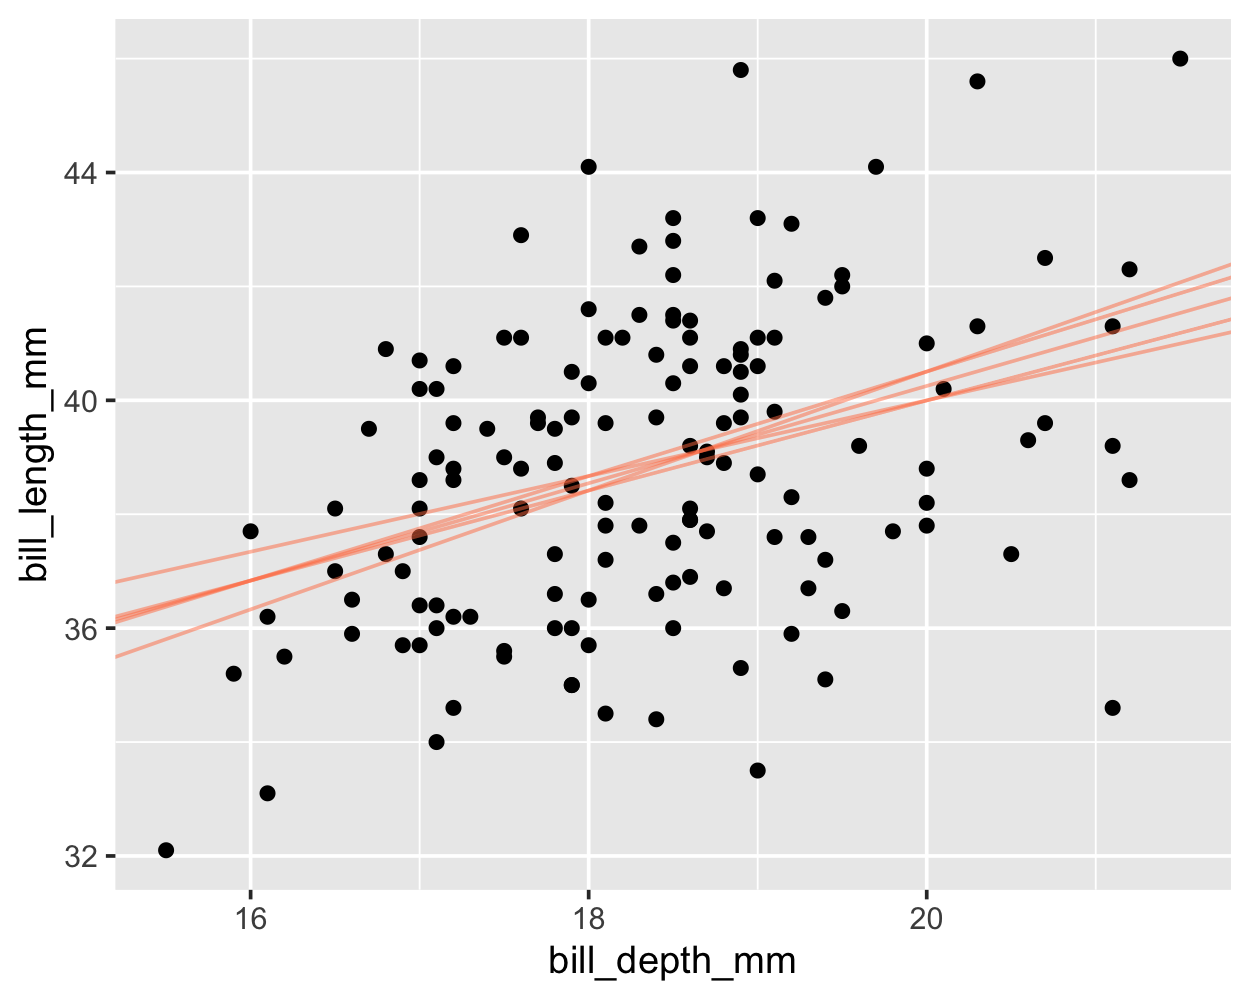

In [5]:
p = ggplot(adelie, aes(x = bill_depth_mm, y = bill_length_mm)) + 
    geom_point(na.rm = T) +
    geom_abline(aes(slope = slope, intercept = intercept), 
                data = models2 |> slice_min(sse, n = 5), 
                alpha = 0.5, color = 'coral')

p

Can you build a model with `Tidymodels` to compare with the output above?

In [ ]:
library('tidymodels')

In [ ]:
# fill in the formula below
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(FORMULA GOES HERE, data = adelie)

tidy(mod_fit)